In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [6]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
import  numpy as np
from glob import glob

# define function to load train, test, and validation datasets
def load_dataset(path):
    data = load_files(path)
    dog_files = np.array(data['filenames'])
    dog_targets = np_utils.to_categorical(np.array(data['target']), 133)
    return dog_files, dog_targets

# load train, test, and validation datasets
train_files, train_targets = load_dataset('gdrive/My Drive/udacity deep learning nd /projects/dog and human project cnn/dogImages/train')
valid_files, valid_targets = load_dataset('gdrive/My Drive/udacity deep learning nd /projects/dog and human project cnn/dogImages/valid')
test_files, test_targets = load_dataset('gdrive/My Drive/udacity deep learning nd /projects/dog and human project cnn/dogImages/test')

# load list of dog names
dog_names = [item[20:-1] for item in sorted(glob("gdrive/My Drive/udacity deep learning nd /projects/dog and human project cnn/dogImages/train/*/"))]

# print statistics about the dataset
print('There are %d total dog categories.' % len(dog_names))
print('There are %s total dog images.\n' % len(np.hstack([train_files, valid_files, test_files])))
print('There are %d training dog images.' % len(train_files))
print('There are %d validation dog images.' % len(valid_files))
print('There are %d test dog images.'% len(test_files))

Using TensorFlow backend.


There are 133 total dog categories.
There are 8351 total dog images.

There are 6680 training dog images.
There are 835 validation dog images.
There are 836 test dog images.


In [7]:
import random
random.seed(8675309)
# set comment -1
# load filenames in shuffled human dataset
human_files = np.array(glob("gdrive/My Drive/udacity deep learning nd /projects/dog and human project cnn/lfw/*/*"))
random.shuffle(human_files)

# print statistics about the dataset
print('There are %d total human images.' % len(human_files))

There are 13233 total human images.


Number of faces detected: 1


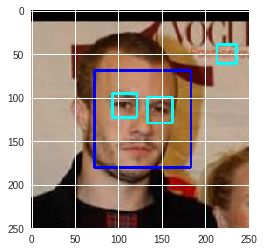

In [8]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('gdrive/My Drive/udacity deep learning nd /projects/dog and human project cnn/dog-project-master/haarcascades/haarcascade_frontalface_alt.xml')
eye_cascade=cv2.CascadeClassifier('gdrive/My Drive/udacity deep learning nd /projects/dog and human project cnn/dog-project-master/haarcascades/haarcascade_eye.xml')
prof_face_cascade=cv2.CascadeClassifier('gdrive/My Drive/udacity deep learning nd /projects/dog and human project cnn/dog-project-master/haarcascades/haarcascade_profileface.xml')
# load color (BGR) image
img = cv2.imread(human_files[3])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)
eyes=eye_cascade.detectMultiScale(gray)
prof_faces=prof_face_cascade.detectMultiScale(gray)
# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
for (x,y,w,h) in eyes:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,0),2)
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

In [ ]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    v=0
    h=0
    z=0
    x=0
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    prof_faces=prof_face_cascade.detectMultiScale(gray)
    if len(faces) >0:
      v=1.5
   
    if len(prof_faces) > 0:
      h=1+v
    z=v+h
    if z>=1.5:
      return True 


In [10]:
a=0
b=0
human_files_short = human_files[:100]
dog_files_short = train_files[:100]
humans_imgs=len(human_files_short)
dogs_imgs=len(human_files_short)
# Do NOT modify the code above this line.
for i in range(humans_imgs):
  face=face_detector(human_files_short[i])
  if (face == True ):
    a += 1
    
print(a/100)

for i in range(dogs_imgs):
  face=face_detector(dog_files_short[i])
  if face == True:
    b += 1
print(b/100)
## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

0.98
0.12


In [ ]:
from keras.applications.resnet50 import ResNet50

In [ ]:
ResNet50_model= ResNet50(weights='imagenet',)

In [ ]:
from keras.preprocessing import image                  
from tqdm import tqdm

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

In [ ]:
from keras.applications.resnet50 import preprocess_input, decode_predictions

def ResNet50_predict_labels(img_path):
    # returns prediction vector for image located at img_path
    img = preprocess_input(path_to_tensor(img_path))
    return np.argmax(ResNet50_model.predict(img))

In [ ]:
def dog_detector(img_path):
    prediction = ResNet50_predict_labels(img_path)
    return ((prediction <= 268) & (prediction >= 151)) 

In [72]:
a=0
b=0
for i in range(len(human_files_short)):
  pred= dog_detector(human_files_short[i])
  if pred==True :
    a=a+1
  else :
    b=b+1
a=(a*100)/len(dog_files_short)
b=(b*100)/len(human_files_short)

print(a,"% of the first 100 images in human_files had a dog detected in them.")
print(b,"% of the first 100 images in dog_files had a dog detected in them.")

1.0 % of the first 100 images in human_files had a dog detected in them.
99.0 % of the first 100 images in dog_files had a dog detected in them.


In [13]:
from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True                 

# pre-process the data for Keras
train_tensors = paths_to_tensor(train_files).astype('float32')/255
valid_tensors = paths_to_tensor(valid_files).astype('float32')/255
test_tensors = paths_to_tensor(test_files).astype('float32')/255

100%|██████████| 836/836 [00:08<00:00, 95.57it/s] 


In [14]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding='same',input_shape=(224, 224, 3),activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=32,kernel_size=2,padding='same',activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=64,kernel_size=2,padding='same',activation='relu'))
model.add(MaxPooling2D())

model.add(GlobalAveragePooling2D())
model.add(Dense(133,activation='relu'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 64)                0         
__________

In [ ]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
from keras.callbacks import ModelCheckpoint  

### TODO: specify the number of epochs that you would like to use to train the model.

epochs = 5

### Do NOT modify the code below this line.

checkpointer = ModelCheckpoint(filepath='weights.best.from_scratch.hdf5', 
                               verbose=1, save_best_only=True)

model.fit(train_tensors, train_targets, 
          validation_data=(valid_tensors, valid_targets),
          epochs=epochs, batch_size=20, callbacks=[checkpointer], verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 6680 samples, validate on 835 samples
Epoch 1/5
6680/6680 [==============================] - 15s 2ms/step - loss: 11.7654 - acc: 0.0075 - val_loss: 11.9871 - val_acc: 0.0108

Epoch 00001: val_loss improved from inf to 11.98707, saving model to weights.best.from_scratch.hdf5
Epoch 2/5
6680/6680 [==============================] - 13s 2ms/step - loss: 12.3003 - acc: 0.0081 - val_loss: 13.1738 - val_acc: 0.0084

Epoch 00002: val_loss did not improve from 11.98707
Epoch 3/5
6680/6680 [==============================] - 13s 2ms/step - loss: 12.7954 - acc: 0.0091 - val_loss: 12.4136 - val_acc: 0.0096

Epoch 00003: val_loss did not improve from 11.98707
Epoch 4/5
6680/6680 [==============================] - 13s 2ms/step - loss: 12.8058 - acc: 0.0096 - val_loss: 12.6264 - val_acc: 0.0096

Epoch 00004: val_loss did not improve from 11.98707
Epoch 5/5
6680/6680 [==============================] - 13s 2ms/step - loss: 12.9743 - acc: 0.0079 - v

In [ ]:
model.load_weights('weights.best.from_scratch.hdf5')

In [18]:
# get index of predicted dog breed for each image in test set
dog_breed_predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

# report test accuracy
test_accuracy = 100*np.sum(np.array(dog_breed_predictions)==np.argmax(test_targets, axis=1))/len(dog_breed_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 1.1962%


In [ ]:
bottleneck_features = np.load('gdrive/My Drive/udacity deep learning nd /projects/dog and human project cnn/dog-project-master/bottleneck_features/DogVGG16Data.npz')
train_VGG16 = bottleneck_features['train']
valid_VGG16 = bottleneck_features['valid']
test_VGG16 = bottleneck_features['test']

In [20]:
VGG16_model = Sequential()
VGG16_model.add(GlobalAveragePooling2D(input_shape=train_VGG16.shape[1:]))
VGG16_model.add(Dense(133, activation='softmax'))

VGG16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_2 ( (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 133)               68229     
Total params: 68,229
Trainable params: 68,229
Non-trainable params: 0
_________________________________________________________________


In [ ]:
VGG16_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [22]:
checkpointer = ModelCheckpoint(filepath='weights.best.VGG16.hdf5', 
                               verbose=1, save_best_only=True)

VGG16_model.fit(train_VGG16, train_targets, 
          validation_data=(valid_VGG16, valid_targets),
          epochs=20, batch_size=20, callbacks=[checkpointer], verbose=1)

Train on 6680 samples, validate on 835 samples
Epoch 1/20
6680/6680 [==============================] - 2s 362us/step - loss: 12.5118 - acc: 0.1207 - val_loss: 10.9159 - val_acc: 0.2120

Epoch 00001: val_loss improved from inf to 10.91587, saving model to weights.best.VGG16.hdf5
Epoch 2/20
6680/6680 [==============================] - 2s 238us/step - loss: 10.5434 - acc: 0.2605 - val_loss: 10.3382 - val_acc: 0.2838

Epoch 00002: val_loss improved from 10.91587 to 10.33816, saving model to weights.best.VGG16.hdf5
Epoch 3/20
6680/6680 [==============================] - 2s 238us/step - loss: 9.9744 - acc: 0.3177 - val_loss: 9.9644 - val_acc: 0.3090

Epoch 00003: val_loss improved from 10.33816 to 9.96437, saving model to weights.best.VGG16.hdf5
Epoch 4/20
6680/6680 [==============================] - 2s 234us/step - loss: 9.6075 - acc: 0.3516 - val_loss: 9.6204 - val_acc: 0.3353

Epoch 00004: val_loss improved from 9.96437 to 9.62039, saving model to weights.best.VGG16.hdf5
Epoch 5/20
6680/6

In [ ]:
VGG16_model.load_weights('weights.best.VGG16.hdf5')

In [24]:
# get index of predicted dog breed for each image in test set
VGG16_predictions = [np.argmax(VGG16_model.predict(np.expand_dims(feature, axis=0))) for feature in test_VGG16]

# report test accuracy
test_accuracy = 100*np.sum(np.array(VGG16_predictions)==np.argmax(test_targets, axis=1))/len(VGG16_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 44.8565%


In [ ]:
from extract_bottleneck_features import *

def VGG16_predict_breed(img_path):
    # extract bottleneck features
    bottleneck_feature = extract_VGG16(path_to_tensor(img_path))
    # obtain predicted vector
    predicted_vector = VGG16_model.predict(bottleneck_feature)
    # return dog breed that is predicted by the model
    return dog_names[np.argmax(predicted_vector)]

In [1]:
print(VGG16_predict_breed('gdrive/My Drive/udacity deep learning nd /projects/dog and human project cnn/dog-project-master/images/Labrador_retriever_06449.jpg'))


NameError: ignored

In [ ]:
import urllib

In [4]:
urllib.request.urlretrieve('https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogXceptionData.npz',"DogXceptionData.npz")

('DogXceptionData.npz', <http.client.HTTPMessage at 0x7fbfc6615b70>)

In [ ]:
bottleneck_features = np.load('DogXceptionData.npz')
train_Xception = bottleneck_features['train']
valid_Xception = bottleneck_features['valid']
test_Xception = bottleneck_features['test']

In [ ]:
### TODO: Define your architecture.
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential


In [ ]:
x_model=Sequential()

In [ ]:
x_model.add(GlobalAveragePooling2D(input_shape=train_Xception.shape[1:]))

In [18]:
x_model.add(Dense(133,activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [19]:
x_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 133)               272517    
Total params: 272,517
Trainable params: 272,517
Non-trainable params: 0
_________________________________________________________________


In [ ]:
### TODO: Compile the model.

x_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [23]:
from keras.callbacks import ModelCheckpoint


checkpointer = ModelCheckpoint(filepath='weights.best.x_model.hdf5', 
                               verbose=1, save_best_only=True)

x_model.fit(train_Xception, train_targets, 
          validation_data=(valid_Xception, valid_targets),
          epochs=20, batch_size=20, callbacks=[checkpointer], verbose=1)


Train on 6680 samples, validate on 835 samples
Epoch 1/20
6680/6680 [==============================] - 3s 421us/step - loss: 0.4011 - acc: 0.8759 - val_loss: 0.4868 - val_acc: 0.8407

Epoch 00001: val_loss improved from inf to 0.48675, saving model to weights.best.x_model.hdf5
Epoch 2/20
6680/6680 [==============================] - 2s 363us/step - loss: 0.3278 - acc: 0.8969 - val_loss: 0.4861 - val_acc: 0.8527

Epoch 00002: val_loss improved from 0.48675 to 0.48605, saving model to weights.best.x_model.hdf5
Epoch 3/20
6680/6680 [==============================] - 2s 365us/step - loss: 0.2815 - acc: 0.9126 - val_loss: 0.4761 - val_acc: 0.8575

Epoch 00003: val_loss improved from 0.48605 to 0.47606, saving model to weights.best.x_model.hdf5
Epoch 4/20
6680/6680 [==============================] - 2s 372us/step - loss: 0.2436 - acc: 0.9251 - val_loss: 0.5097 - val_acc: 0.8587

Epoch 00004: val_loss did not improve from 0.47606
Epoch 5/20
6680/6680 [==============================] - 2s 366us

In [ ]:
x_model.load_weights('weights.best.x_model.hdf5')

In [25]:
x_predictions = [np.argmax(x_model.predict(np.expand_dims(feature, axis=0))) for feature in test_Xception]

# report test accuracy
test_accuracy = 100*np.sum(np.array(x_predictions)==np.argmax(test_targets, axis=1))/len(x_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)


Test accuracy: 85.5263%


In [ ]:
def extract_xnception(tensor):
  from keras.applications.xception import Xception ,preprocess_input
  return Xception(weights='imagenet', include_top=False).predict(preprocess_input(tensor))


In [ ]:
top_N = 4

def predict_breed(path):
    
    # load image using path_to_tensor
    print('Loading image...')
    image_tensor = path_to_tensor(path)
    
    # obtain bottleneck features using extract_InceptionV3
    print('Extracting bottleneck features...')
    bottleneck_features = extract_xnception(image_tensor)
    
    # feed into top_model for breed prediction
    print('Feeding bottlenneck features into top model...')
    prediction = x_model.predict(bottleneck_features)
    

    return dog_names[np.argmax(prediction)] ,np.argmax(prediction)
   

In [55]:
name , pres=predict_breed("gdrive/My Drive/udacity deep learning nd /projects/dog and human project cnn/dog-project-master/images/Labrador_retriever_06455.jpg")

Loading image...
Extracting bottleneck features...
Feeding bottlenneck features into top model...


In [56]:
print (name , pres)

ity deep learning nd /projects/dog and human project cnn/dogImages/train/096.Labrador_retriever 95


In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

def make_prediction(path, multiple_breeds = False):
    breeds, confidence = predict_breed(path)
    img = mpimg.imread(path)
    plt.axis('off')
    
    # since the dog detector worked better, and we don't have 
    # access to softmax probabilities from dog and face detectors
    # we'll first check for dog detection, and only if there are no dogs
    # detected we'll check for humans
    if dog_detector(path):
        print('Woof woof!')
        imgplot = plt.imshow(img)
        print('You look like a {}.'.format(breeds[77:].replace("_", " ")))
        
        if multiple_breeds:
            print('\n\nTop 4 predictions (for mixed breeds)')
            for i, j in zip(breeds, confidence):
                print('Predicted breed: {} with a confidence of {:.4f}'.format(i.replace("_", " "), j))
        
    elif face_detector(path):
        print('Hello human!')
        imgplot = plt.imshow(img)
        print('If you were a dog, you\'d be a {}.'.format(breeds[77:].replace("_", " ")))
    else:
        raise ValueError('Could not detect dogs or humans in image.')


Loading image...
Extracting bottleneck features...
Feeding bottlenneck features into top model...
Woof woof!
You look like a Labrador retriever.


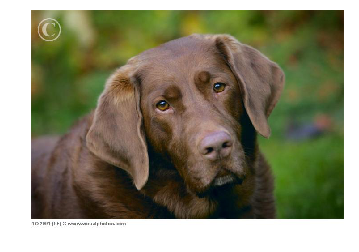

In [92]:
make_prediction("gdrive/My Drive/udacity deep learning nd /projects/dog and human project cnn/dog-project-master/images/Labrador_retriever_06455.jpg")

Loading image...
Extracting bottleneck features...
Feeding bottlenneck features into top model...
Hello human!
If you were a dog, you'd be a Chinese shar-pei.


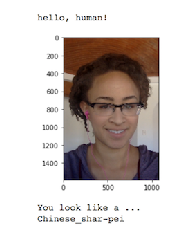

In [95]:
make_prediction("gdrive/My Drive/udacity deep learning nd /projects/dog and human project cnn/dog-project-master/images/sample_human_output.png")